<a href="https://colab.research.google.com/github/Leonkeneddy86/Analisis-Covid-19-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import: Es el comando que le dice a Python "Ve a buscar esta herramienta".

pandas: Es el nombre de la librería que queremos traer.

as pd: Esto es un alias. En lugar de escribir pandas cada vez que queramos usarla, le ponemos un apodo corto: pd. Es un estándar en la industria; todo el mundo lo llama pd

In [25]:
import pandas as pd
import warnings

In [26]:
df = pd.read_csv("all-states-history.csv")
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


Inspección de la Estructura

df.shape (La Forma):

Concepto: Piensa en esto como preguntar: "¿De qué tamaño es nuestra tabla?". Devuelve una tupla (filas, columnas). El primer número son las observaciones (filas o días/estados en este caso) y el segundo número son las variables (columnas o características).

df.info() (El Reporte de Calidad):

Concepto: Este es nuestro reporte más importante. Nos dice, columna por columna, tres cosas fundamentales:

Tipo de dato (Dtype): ¿Python lo está interpretando como texto (object), número entero (int64), número decimal (float64) o fecha? Esto es crucial.

Valores No Nulos (Non-Null Count): ¿Cuántas celdas tienen datos en esa columna? Si este número es menor que el número total de filas, significa que hay valores perdidos o valores nulos (NaN).

In [27]:
# Muestra el tamaño del DataFrame (filas, columnas)
print(df.shape)

# Muestra un resumen de cada columna: nombre, tipo de dato y valores no nulos.
df.info()

(20780, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float

Observa la salida de df.info(). Te enfocarás en dos columnas que son clave en este conjunto de datos (que es de seguimiento de COVID-19):

La columna date (fecha) 🗓️.

Las columnas que representan conteos como death, hospitalized, positive (casos, muertes, hospitalizados) 🔢.

la columna date se debera convertir a datatime, para el manejo de horas y fechas

Concepto Clave: Tipos de Datos 🏷️ Si la fecha se queda como object (texto), Pandas no la entiende como un punto en el tiempo. Sería como si Python viera "2021-03-07" simplemente como una secuencia de caracteres, no como algo que puede ordenar o sobre lo que puede calcular una tendencia. Para hacer un buen Análisis Exploratorio de Datos (EDA) y cumplir con la evaluación, la conversión es obligatoria.

Conversión de Tipo de Dato

Para solucionar esto, usamos la función pd.to_datetime() de Pandas.

df['date']: Estamos seleccionando la columna date de nuestro DataFrame. Piensa en esto como si le pusieras el dedo encima a esa columna específica en tu tabla.

pd.to_datetime(...): Es la receta mágica de Pandas que toma la columna de texto y la transforma en un formato de fecha reconocido.

df['date'] = ...: Esto es una reasignación. Tomamos la columna recién convertida y la guardamos de nuevo en el mismo lugar, sobrescribiendo la columna de texto original.

In [28]:
df["date"] = pd.to_datetime(df["date"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              20780 non-null  datetime64[ns]
 1   state                             20780 non-null  object        
 2   death                             19930 non-null  float64       
 3   deathConfirmed                    9422 non-null   float64       
 4   deathIncrease                     20780 non-null  int64         
 5   deathProbable                     7593 non-null   float64       
 6   hospitalized                      12382 non-null  float64       
 7   hospitalizedCumulative            12382 non-null  float64       
 8   hospitalizedCurrently             17339 non-null  float64       
 9   hospitalizedIncrease              20780 non-null  int64         
 10  inIcuCumulative                   3789 non-nul

la Limpieza de Datos, específicamente la Detección y Tratamiento de Valores Faltantes (o Valores Nulos, denotados como NaN en Pandas)

Concepto Clave: Valores Nulos (NaN) ❓ Piensa en un valor nulo como un hueco en tu tabla. Si una columna tiene muchos huecos, esa columna podría ser inútil para el análisis. Necesitamos saber la cantidad exacta de estos huecos.

Paso 5: Contar los Valores Faltantes
Aunque df.info() nos da una idea (las cuentas que no llegan al total de filas), queremos ver el número exacto, ordenado por columna.

Vamos a usar una combinación de comandos muy útil en Pandas:

df.isnull():

Le pregunta a Pandas, celda por celda: "¿Es esta celda nula?". Devuelve una tabla idéntica a df pero llena solo de True (si es nulo) o False (si no lo es).

.sum():

Como Python trata True como el número 1 y False como 0, al aplicar .sum() al resultado de isnull(), suma todos los Trues, dándonos el conteo total de valores nulos por cada columna.

In [30]:
# Cuenta el número de valores nulos por cada columna
df.isnull().sum()

,0
date,0
state,0
death,850
deathConfirmed,11358
deathIncrease,0
deathProbable,13187
hospitalized,8398
hospitalizedCumulative,8398
hospitalizedCurrently,3441
hospitalizedIncrease,0


Librerias para graficas, visualizaciones de datos faltantes

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


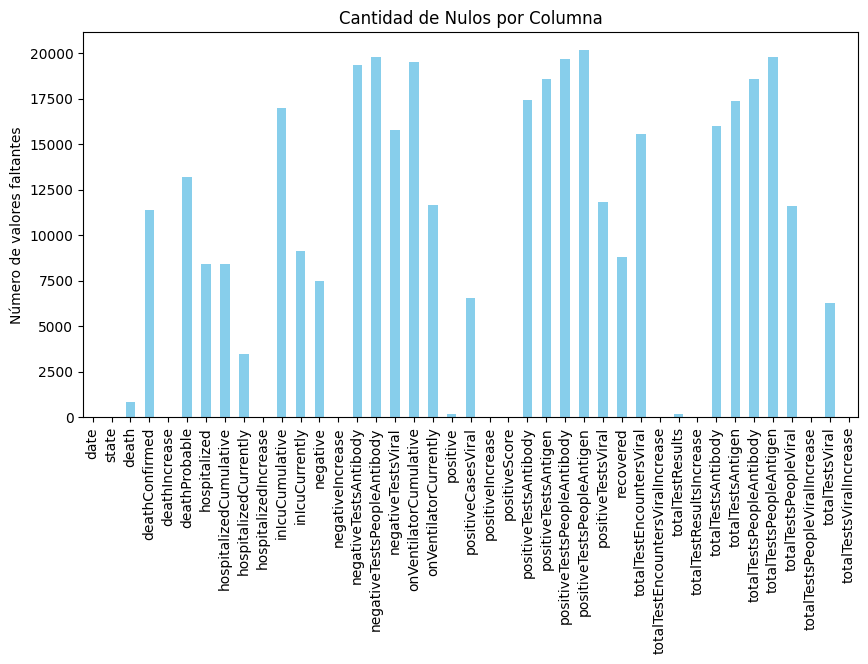

In [32]:
# Cuenta nulos y los grafica
df.isna().sum().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Cantidad de Nulos por Columna")
plt.ylabel("Número de valores faltantes")
plt.show()

Ver porcentaje exacto en %

In [33]:
# Calcula la media, multiplica por 100 y añade el símbolo %
porcentaje_nulos = (df.isna().mean() * 100).map("{:.2f}%".format)
print(porcentaje_nulos)


date                                 0.00%
state                                0.00%
death                                4.09%
deathConfirmed                      54.66%
deathIncrease                        0.00%
deathProbable                       63.46%
hospitalized                        40.41%
hospitalizedCumulative              40.41%
hospitalizedCurrently               16.56%
hospitalizedIncrease                 0.00%
inIcuCumulative                     81.77%
inIcuCurrently                      44.00%
negative                            36.04%
negativeIncrease                     0.00%
negativeTestsAntibody               92.98%
negativeTestsPeopleAntibody         95.32%
negativeTestsViral                  75.82%
onVentilatorCumulative              93.79%
onVentilatorCurrently               56.08%
positive                             0.90%
positiveCasesViral                  31.44%
positiveIncrease                     0.00%
positiveScore                        0.00%
positiveTes

Creacion de variable y eliminar columnas bajo un umbral

In [34]:
# 1. Recalculamos porcentajes
porcentajes_nulos = df.isnull().mean() * 100

# 2. Definimos el nuevo umbral del 40%
umbral_minimo = 40.0

# 3. Creamos la lista basada en el nuevo umbral
columnas_a_eliminar = porcentajes_nulos[porcentajes_nulos > umbral_minimo].index.tolist()

# 4. Eliminamos de forma permanente
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

print(f"Umbral aplicado: {umbral_minimo}%")
print(f"Número de columnas eliminadas: {len(columnas_a_eliminar)}")

Umbral aplicado: 40.0%
Número de columnas eliminadas: 23


# Parámetros de `drop` en Pandas

| Argumento | Propósito | Valor clave |
|-----------|-----------|-------------|
| `columns` | Especifica las columnas a eliminar. | Tu lista de columnas (`columnas_a_eliminar`). |
| `inplace` | Hace que la modificación se guarde permanentemente en el `df` original. | `True` |
`errors=ignore`  | El programa simplemente borra o salta los caracteres que no entiende y lee todo lo demás |


Vemos el tamaño nuevo usando shape

In [35]:
print(df.shape)

(20780, 18)


Generamos de nuevo la grafica y contamos los nulos

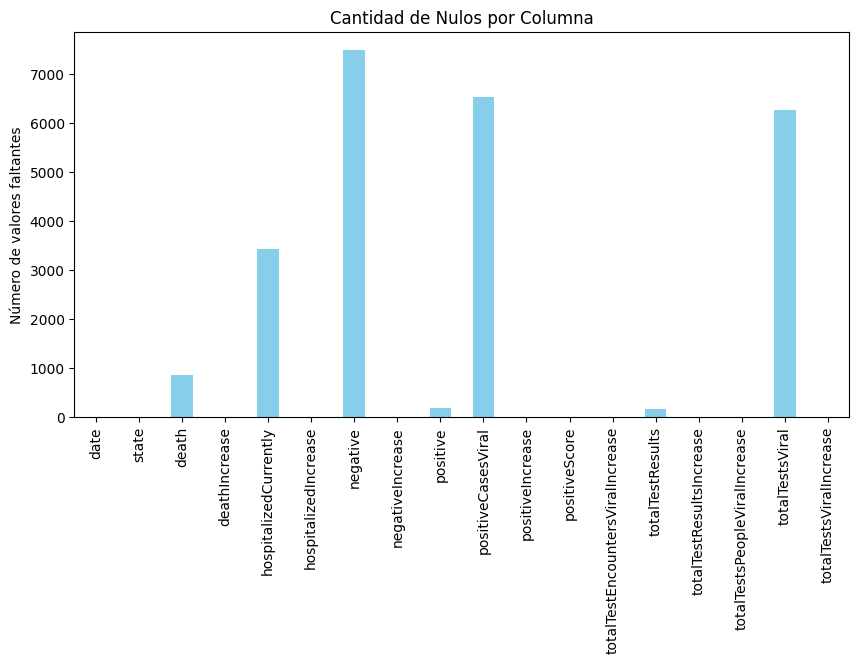

In [36]:
# Cuenta nulos y los grafica
df.isna().sum().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Cantidad de Nulos por Columna")
plt.ylabel("Número de valores faltantes")
plt.show()

Volvemos a ver los porcentajes

In [37]:
# Calcula la media, multiplica por 100 y añade el símbolo %
porcentaje_nulos = (df.isna().mean() * 100).map("{:.2f}%".format)
print(porcentaje_nulos)

date                                 0.00%
state                                0.00%
death                                4.09%
deathIncrease                        0.00%
hospitalizedCurrently               16.56%
hospitalizedIncrease                 0.00%
negative                            36.04%
negativeIncrease                     0.00%
positive                             0.90%
positiveCasesViral                  31.44%
positiveIncrease                     0.00%
positiveScore                        0.00%
totalTestEncountersViralIncrease     0.00%
totalTestResults                     0.80%
totalTestResultsIncrease             0.00%
totalTestsPeopleViralIncrease        0.00%
totalTestsViral                     30.14%
totalTestsViralIncrease              0.00%
dtype: object


calcular la matriz de correlación es una herramienta fundamental en el Análisis Exploratorio de Datos (EDA) porque nos permite ver, de un vistazo, cómo se mueven las variables entre sí.



# La Matriz de correlacion

La correlación mide la relación estadística entre dos variables numéricas. El resultado siempre es un número entre -1 y 1:

1: Correlación positiva perfecta (si una sube, la otra también).

0: No hay relación lineal.

-1: Correlación negativa perfecta (si una sube, la otra baja).

Para visualizar esto de forma profesional (como un mapa de calor), seguiremos estos pasos:

Calcular la matriz: Usamos df.corr().

Visualizar: Usamos la librería seaborn para crear un Heatmap.

# Parametros de Heatmap



annot=True: Escribe el número de la correlación dentro de cada cuadro.

cmap='coolwarm': Usa azul para correlaciones negativas y rojo para las positivas.

fmt=".2f": Muestra solo dos decimales para que sea fácil de leer.

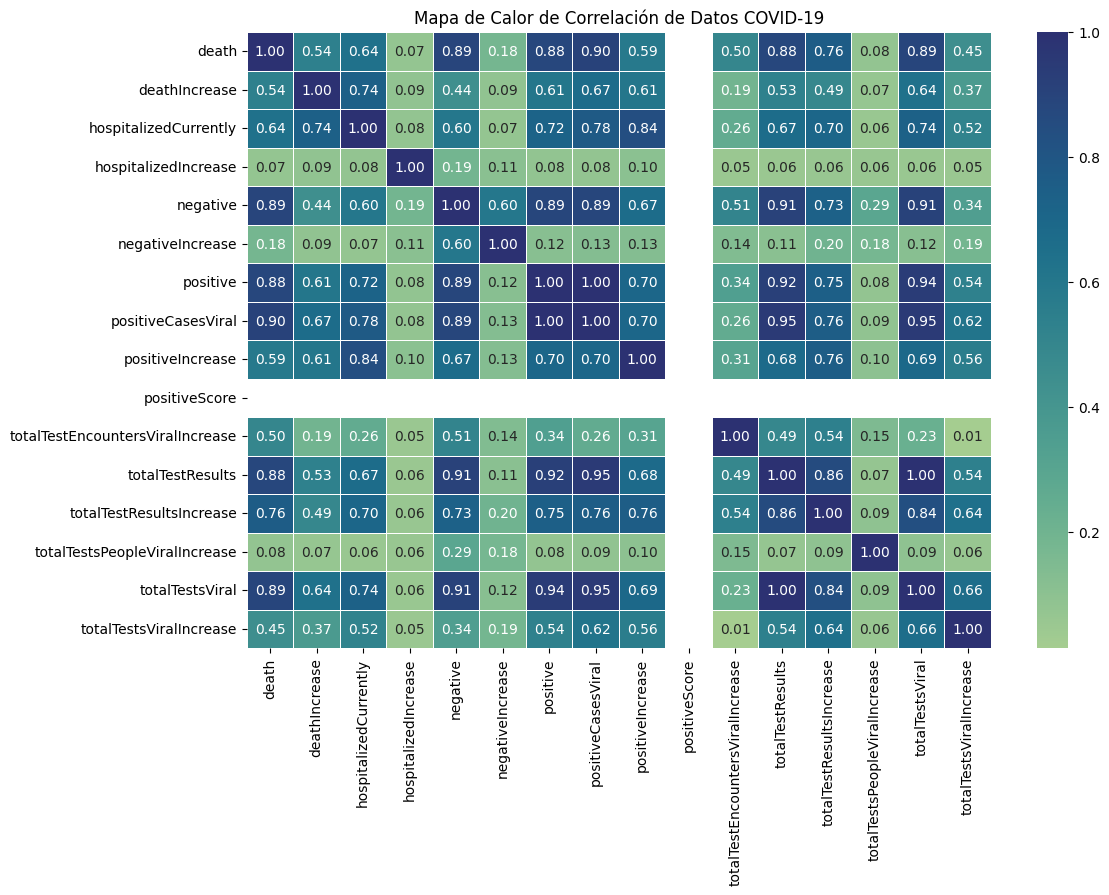

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos la matriz de correlación
# Usamos numeric_only=True para que solo tome las columnas con números
matriz_corr = df.corr(numeric_only=True)

# 2. Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

# 3. Creamos el mapa de calor (Heatmap)
sns.heatmap(matriz_corr, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor de Correlación de Datos COVID-19")
plt.show()

In [39]:
# Vamos a ver qué valores únicos tiene esta columna
print(df['positiveScore'].value_counts())

positiveScore
0    20780
Name: count, dtype: int64


0 (Izquierda): Este es el valor que encontró en la columna.

20780 (Derecha): Esta es la cantidad de veces que aparece ese valor


en las 20,780 filas de tu tabla, el valor de positiveScore es siempre 0. No cambia nunca. Es una "constante"



Si una variable nunca cambia (su varianza es cero), la fórmula matemática intenta dividir por cero y falla.

Por eso Pandas devolvió un valor nulo (NaN) y el mapa de calor lo dejó en blanco

In [40]:
df.head() # aqui vemos que efectivamente son todas las filas 0, por tanto decidimos que hacer con ella.

,date,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,positiveScore,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0,33.0,0,NaN,0,56886.0,NaN,0,0,0,1731628.0,0,0,1731628.0,0
1,2021-03-07,AL,10148.0,-1,494.0,0,1931711.0,2087,499819.0,392077.0,408,0,0,2323788.0,2347,2347,NaN,0
2,2021-03-07,AR,5319.0,22,335.0,11,2480716.0,3267,324818.0,255726.0,165,0,0,2736442.0,3380,0,2736442.0,3380
3,2021-03-07,AS,0.0,0,NaN,0,2140.0,0,0.0,0.0,0,0,0,2140.0,0,0,2140.0,0
4,2021-03-07,AZ,16328.0,5,963.0,44,3073010.0,13678,826454.0,769935.0,1335,0,0,7908105.0,45110,14856,7908105.0,45110


# Vamos a pedirle a Pandas que busque cualquier valor diferente de 0. Si la tabla resultante está vacía

In [41]:
# Muestra los valores únicos (debería salir solo [0])
print("Valores únicos encontrados:", df['positiveScore'].unique())

# Intenta filtrar filas donde el valor NO sea 0
excepciones = df[df['positiveScore'] != 0]

# Muestra si encontró alguna excepción
print("\nFilas que no son cero:")
print(excepciones)

Valores únicos encontrados: [0]

Filas que no son cero:
Empty DataFrame
Columns: [date, state, death, deathIncrease, hospitalizedCurrently, hospitalizedIncrease, negative, negativeIncrease, positive, positiveCasesViral, positiveIncrease, positiveScore, totalTestEncountersViralIncrease, totalTestResults, totalTestResultsIncrease, totalTestsPeopleViralIncrease, totalTestsViral, totalTestsViralIncrease]
Index: []


# Si el resultado de excepciones es Empty DataFrame, entonces confirmado: es una columna "fantasma" sin información, la eliminaremos con el argumento "del"

In [42]:
del df['positiveScore']

# Hacemos un head()

In [43]:
df.head()

,date,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0,33.0,0,NaN,0,56886.0,NaN,0,0,1731628.0,0,0,1731628.0,0
1,2021-03-07,AL,10148.0,-1,494.0,0,1931711.0,2087,499819.0,392077.0,408,0,2323788.0,2347,2347,NaN,0
2,2021-03-07,AR,5319.0,22,335.0,11,2480716.0,3267,324818.0,255726.0,165,0,2736442.0,3380,0,2736442.0,3380
3,2021-03-07,AS,0.0,0,NaN,0,2140.0,0,0.0,0.0,0,0,2140.0,0,0,2140.0,0
4,2021-03-07,AZ,16328.0,5,963.0,44,3073010.0,13678,826454.0,769935.0,1335,0,7908105.0,45110,14856,7908105.0,45110


# Ordenamos los datos por fecha

In [44]:
df = df.sort_values('date')

# Curva de Contagios

####Esta gráfica muestra cuántas personas nuevas dieron positivo cada día.

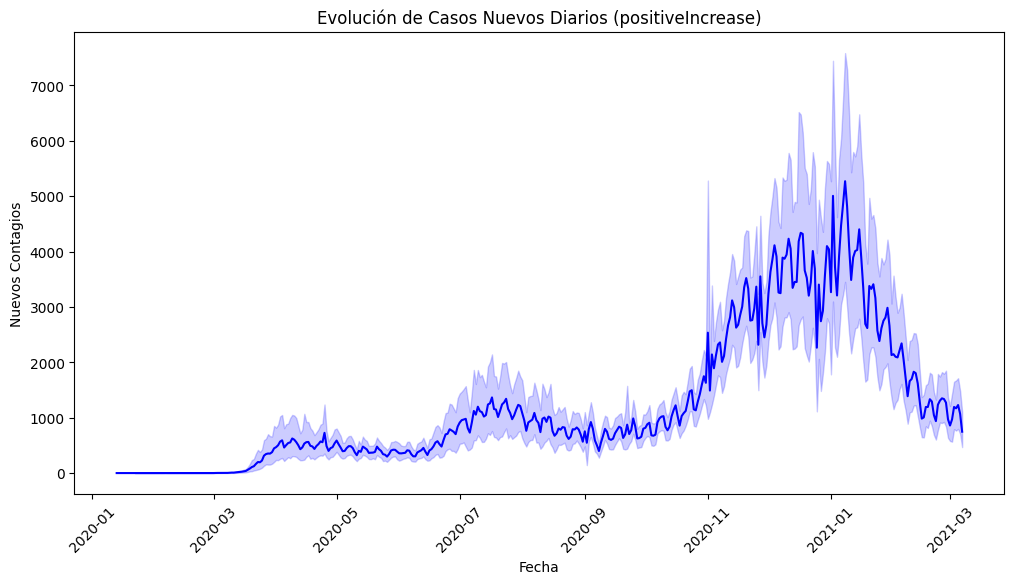

In [45]:
# Definimos el tamaño del "lienzo" (ancho, alto)
plt.figure(figsize=(12, 6))

# Dibujamos la línea: x es el tiempo, y es el aumento de casos
sns.lineplot(data=df, x='date', y='positiveIncrease', color='blue')

# Añadimos un título y etiquetas a los ejes
plt.title('Evolución de Casos Nuevos Diarios (positiveIncrease)')
plt.xlabel('Fecha')
plt.ylabel('Nuevos Contagios')

# Giramos las fechas del eje X para que no se amontonen y se lean bien
plt.xticks(rotation=45)

# Mostramos la gráfica final
plt.show()

Concepto positiveIncrease: Representa la "velocidad" del virus. Si la línea sube, el virus se propaga más rápido; si baja, la curva se está aplanando.

¿Por qué lineplot? Es el mejor para ver tendencias. Nos permite ver las "olas" o picos de contagio a través de los meses

#Impacto en la Mortalidad
Aquí observamos la consecuencia más grave de la pandemia: los fallecimientos diarios registrados.

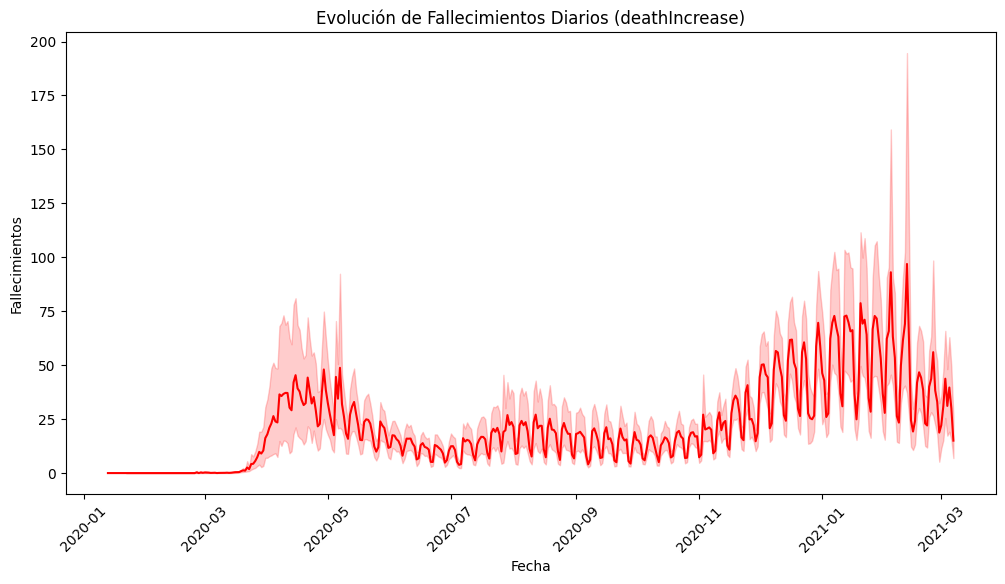

In [46]:
plt.figure(figsize=(12, 6))

# Aquí la variable clave es 'deathIncrease'
sns.lineplot(data=df, x='date', y='deathIncrease', color='red')

plt.title('Evolución de Fallecimientos Diarios (deathIncrease)')
plt.xlabel('Fecha')
plt.ylabel('Fallecimientos')
plt.xticks(rotation=45)

plt.show()

#Concepto deathIncrease: Son las muertes nuevas reportadas cada día.

Relación visual: Si comparas esta gráfica con la anterior, notarás que los picos rojos suelen ocurrir un poco después de los picos azules de contagios. A esto se le llama "desfase".

# Presión Hospitalaria

Esta gráfica es distinta porque no mide "nuevos casos", sino cuántas personas están ocupando una cama de hospital en un momento dado.


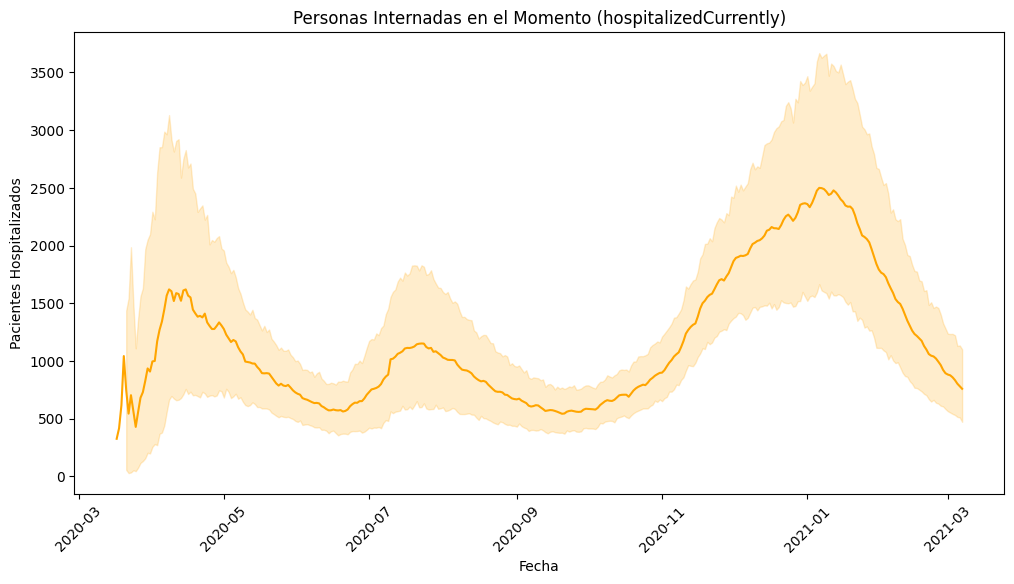

In [47]:
plt.figure(figsize=(12, 6))

# Usamos 'hospitalizedCurrently'
sns.lineplot(data=df, x='date', y='hospitalizedCurrently', color='orange')

plt.title('Personas Internadas en el Momento (hospitalizedCurrently)')
plt.xlabel('Fecha')
plt.ylabel('Pacientes Hospitalizados')
plt.xticks(rotation=45)

plt.show()

#Concepto hospitalizedCurrently

*   Concepto hospitalizedCurrently A diferencia de los "aumentos" (Increase), este es un estado actual. Es como una foto del hospital hoy: ¿cuántas camas están ocupadas?

*   Importancia: Sirve para entender si el sistema sanitario estaba saturado o si tenía capacidad de respuesta.


veremos una sombra ligera alrededor de la línea principal.
¿Qué es? Como el archivo tiene datos de muchos estados (NY, CA, TX, etc.) para la misma fecha, Seaborn calcula el promedio (la línea fuerte) y la sombra representa la variación entre los estados.

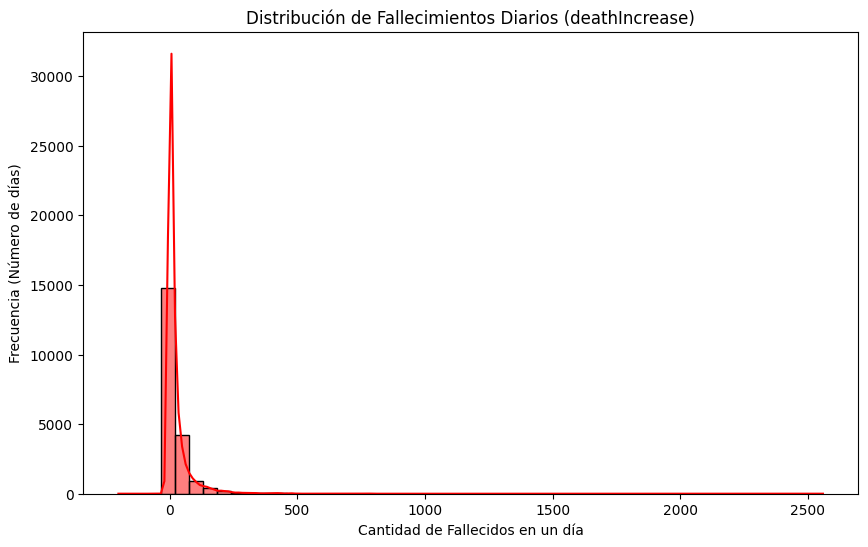

In [48]:
# Definimos el lienzo
plt.figure(figsize=(10, 6))

# Creamos el histograma de fallecimientos diarios
# bins=50 nos da más detalle para ver los días con pocos vs muchos fallecidos
sns.histplot(df['deathIncrease'], bins=50, kde=True, color='red')

# Explicación de las etiquetas:
plt.title('Distribución de Fallecimientos Diarios (deathIncrease)')
plt.xlabel('Cantidad de Fallecidos en un día')
plt.ylabel('Frecuencia (Número de días)')

plt.show()

Explicación de lo que verás en esta gráfica:

La "Barra" más alta: Probablemente esté muy cerca del cero. Esto te dice que la gran mayoría de los días de la pandemia, los fallecimientos por estado se mantuvieron en rangos bajos.

La "Cola" a la derecha: Verás algunas barras muy pequeñas y alejadas hacia la derecha. Esos son los Outliers (valores atípicos) que mencionaba tu guía de EDA. Son esos días negros donde las cifras se dispararon.

Concepto de kde=True: La línea curva que verás encima te ayuda a identificar la "forma" de la pandemia. Si la curva tiene un pico muy alto al principio y baja rápido, los datos están muy concentrados.

¿Por qué esto es mejor que el gráfico de líneas para algunas cosas?

El gráfico de líneas te dice cuándo pasó. El histograma te dice qué tan común fue que pasara.




La Caja: Representa el 50% central de tus datos (desde el percentil 25 al 75).

La Línea Central: Es la mediana (el valor justo en medio).

Los Bigotes: Se extienden hasta los valores que se consideran "normales".

Los Puntos (Outliers): Cualquier dato que aparezca como un punto individual fuera de los bigotes es un valor atípico 👽. Es algo que se sale totalmente de la norma.

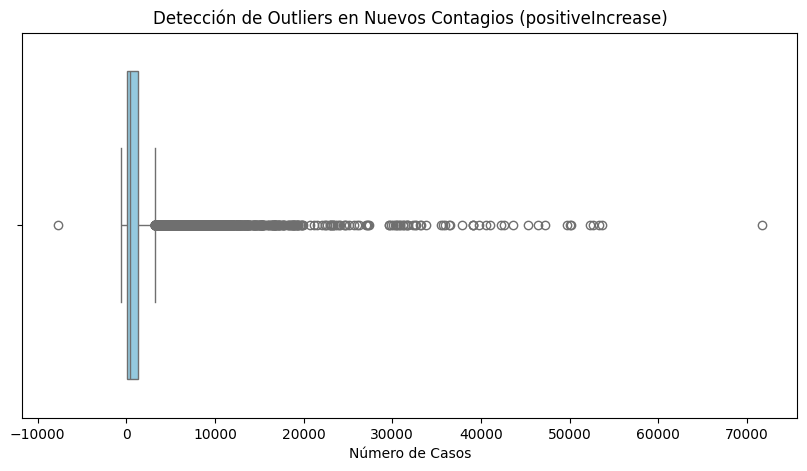

In [49]:
# 1. Definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# 2. Creamos el Boxplot
# orient='h' lo pone en horizontal para que sea más fácil de leer
sns.boxplot(x=df['positiveIncrease'], color='skyblue')

# 3. Personalizamos
plt.title('Detección de Outliers en Nuevos Contagios (positiveIncrease)')
plt.xlabel('Número de Casos')

plt.show()

Anatomía de tu Boxplot

Imagina que tus datos son un grupo de amigos. La mayoría están juntos en una fiesta (la caja), pero hay algunos que se fueron muy lejos:

    La Caja Azul 🟦: Aquí está el "corazón" de tus datos (donde viven la mayoría de los registros). Nota que en tu gráfica es muy delgada y está pegada al cero. Esto significa que la mayoría de los días hubo pocos contagios nuevos.

    Los Bigotes (Líneas grises) 📏: Son los límites de lo que consideramos "normal" estadísticamente.

    Los Círculos Grises ⚪: ¡Estos son tus outliers! Como bien dijiste, hay muchísimos puntos que se alejan hacia la derecha, llegando incluso hasta los 70,000 casos en un solo día.

Podemos usar una técnica matemática llamada Rango Intercuartílico (IQR). No te líes con el nombre, básicamente es una regla para decidir a partir de qué número un dato es un outlier.

In [50]:
# Primero calculamos los cuartiles
Q1 = df['positiveIncrease'].quantile(0.25)
Q3 = df['positiveIncrease'].quantile(0.75)
IQR = Q3 - Q1

# Definimos el límite superior para los outliers
limite_superior = Q3 + 1.5 * IQR

# Filtramos los datos que superan ese límite
outliers_contagios = df[df['positiveIncrease'] > limite_superior]

print(f"El límite de la normalidad es: {limite_superior}")
print(f"Número total de outliers detectados: {len(outliers_contagios)}")

El límite de la normalidad es: 3240.625
Número total de outliers detectados: 2389


Investigar los extremos (Valores más altos)

Lo que estás viendo es el "Top 10" de los días con más contagios en la historia de tu dataset.

In [51]:
# Ordenamos de mayor a menor y mostramos los 10 primeros
top_outliers = df.sort_values('positiveIncrease', ascending=False).head(10)

# Mostramos solo las columnas más importantes para no liarnos
print(top_outliers[['date', 'state', 'positiveIncrease', 'deathIncrease']])

           date state  positiveIncrease  deathIncrease
7103 2020-11-01    TX             71734             53
4541 2020-12-16    CA             53711            293
3589 2021-01-02    CA             53341            386
3197 2021-01-09    CA             52636            695
4485 2020-12-17    CA             52281            379
3925 2020-12-27    CA             50141            237
3253 2021-01-08    CA             50030            493
3141 2021-01-10    CA             49685            468
3645 2021-01-01    CA             47189            585
4317 2020-12-20    CA             46474            161


Gráfico de Dispersión (Scatter Plot)

vamos a ver si existe una relación visual entre esos grandes picos de contagios y los fallecimientos. El Scatter Plot pondrá un punto por cada día: la posición horizontal (X) será el número de contagios y la vertical (Y) el de fallecimientos.



Dominio de California (CA): Fíjate que 9 de los 10 registros son de California. Esto nos indica que fue el estado con los picos más masivos de contagios.

Temporada Invernal: Casi todas las fechas son de diciembre de 2020 y enero de 2021. Esto coincide con una de las olas más fuertes en Estados Unidos.

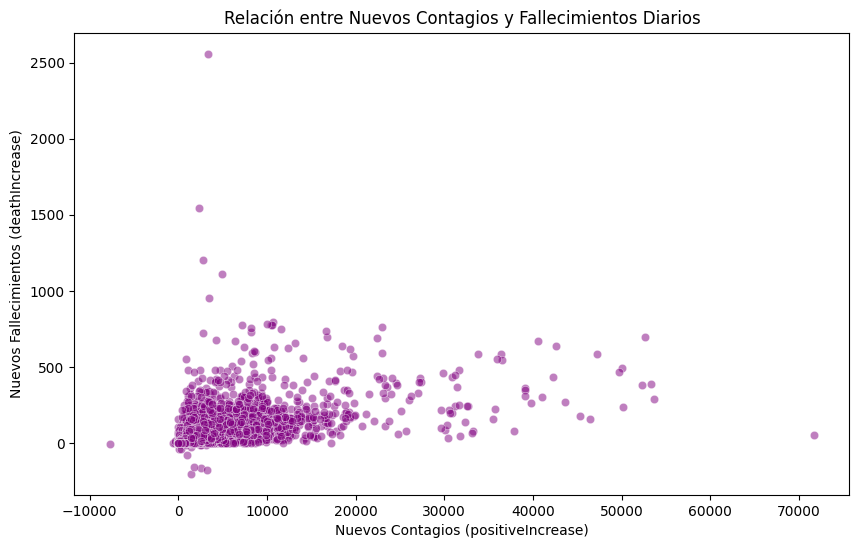

In [52]:
plt.figure(figsize=(10, 6))

# Creamos el gráfico de dispersión
sns.scatterplot(data=df, x='positiveIncrease', y='deathIncrease', alpha=0.5, color='purple')

plt.title('Relación entre Nuevos Contagios y Fallecimientos Diarios')
plt.xlabel('Nuevos Contagios (positiveIncrease)')
plt.ylabel('Nuevos Fallecimientos (deathIncrease)')

plt.show()

En el gráfico verás muchos puntos. Los que están muy a la derecha son estos que acabamos de listar (muchos casos). Pero, ¿notas algunos puntos que estén muy arriba en el eje vertical (Y)? Esos representarían días con muchos fallecimientos.

In [54]:
# Calculamos la correlación entre contagios y muertes
correlacion = df['positiveIncrease'].corr(df['deathIncrease'])

print(f"El coeficiente de correlación es: {correlacion}")

El coeficiente de correlación es: 0.6053820424606402


Un coeficiente de 0.605 indica una correlación positiva moderada-fuerte entre los nuevos contagios (positiveIncrease) y los fallecimientos diarios (deathIncrease).

Relación Directa: Al ser un número positivo, significa que cuando los contagios suben, los fallecimientos también tienden a subir. 📈

Fuerza de la relación: No es una correlación perfecta (que sería 1.0), lo cual tiene sentido en medicina. No todas las personas que se contagian fallecen, y factores como la mejora en los tratamientos o la vacunación hacen que esa relación no sea "matemática" exacta.

El factor tiempo: Recuerda que las muertes suelen ocurrir días o semanas después del contagio. Si hiciéramos esta misma correlación comparando los casos de hoy con las muertes de dentro de 14 días, ¡es muy probable que el número fuera aún más alto

In [55]:
# 1. Agrupamos por estado y sumamos los valores
# Seleccionamos las columnas que nos interesan
estados_totales = df.groupby('state')[['positiveIncrease', 'deathIncrease']].sum()

# 2. Ordenamos de mayor a mayor por contagios
top_estados = estados_totales.sort_values('positiveIncrease', ascending=False).head(10)

# 3. Mostramos el resultado
print(top_estados)

       positiveIncrease  deathIncrease
state                                 
CA              3501341          54124
TX              2686818          44451
FL              1909209          32266
NY              1681169          39029
IL              1198331          23014
GA              1023485          17906
OH               978471          17656
PA               948643          24349
NC               872175          11502
AZ               826452          16328


Comparar estados

Visualizacion en grafico

/tmp/ipython-input-2403266509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_estados.index, y=top_estados['positiveIncrease'], palette='viridis')


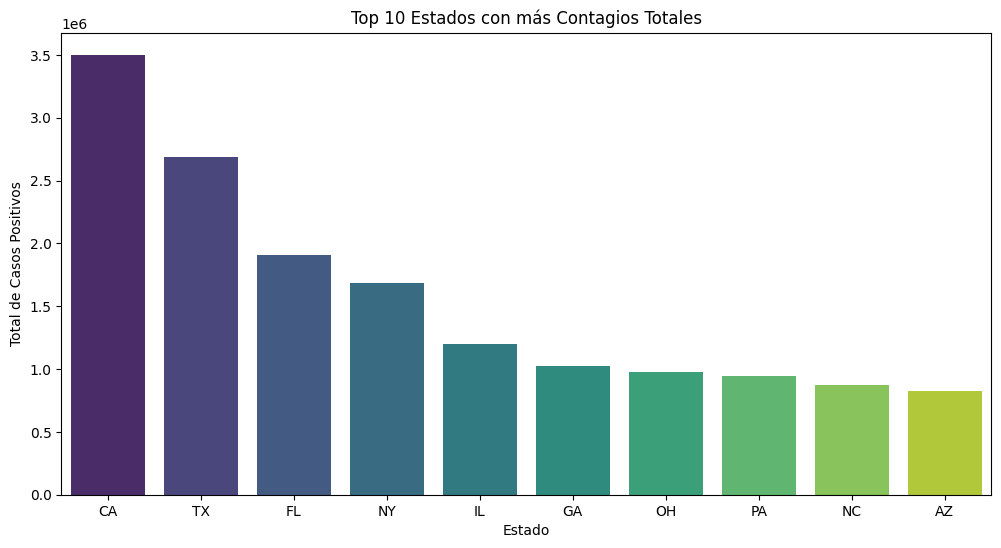

In [56]:
plt.figure(figsize=(12, 6))

# Creamos un gráfico de barras
sns.barplot(x=top_estados.index, y=top_estados['positiveIncrease'], palette='viridis')

plt.title('Top 10 Estados con más Contagios Totales')
plt.xlabel('Estado')
plt.ylabel('Total de Casos Positivos')

plt.show()

Como no tenemos la población exacta en este dataset, podemos usar la Tasa de Letalidad que mencionamos antes como una forma de normalizar. Esta tasa nos dice: "De cada 100 personas que se contagiaron en este estado


Cuando veas la columna letalidad_%:

    Si un estado tiene un 1%, significa que fallece 1 de cada 100 contagiados.

    Si tiene un 3%, la situación es mucho más grave, aunque tenga menos casos totales.

Tasa de letalidad

In [57]:
# Calculamos la Tasa de Letalidad (en porcentaje)
# Muertes totales / Casos positivos totales * 100
estados_totales['letalidad_%'] = (estados_totales['deathIncrease'] / estados_totales['positiveIncrease']) * 100

# Miramos el Top 10 de los estados que ya tenías, pero ahora viendo su letalidad
top_analisis = estados_totales.loc[top_estados.index]
print(top_analisis[['positiveIncrease', 'deathIncrease', 'letalidad_%']])

       positiveIncrease  deathIncrease  letalidad_%
state                                              
CA              3501341          54124     1.545808
TX              2686818          44451     1.654411
FL              1909209          32266     1.690019
NY              1681169          39029     2.321539
IL              1198331          23014     1.920504
GA              1023485          17906     1.749513
OH               978471          17656     1.804448
PA               948643          24349     2.566719
NC               872175          11502     1.318772
AZ               826452          16328     1.975674


Vamos a crear una Media Móvil de 7 días para California. Esto "suavizará" la línea y nos permitirá ver las olas reales de la pandemia.

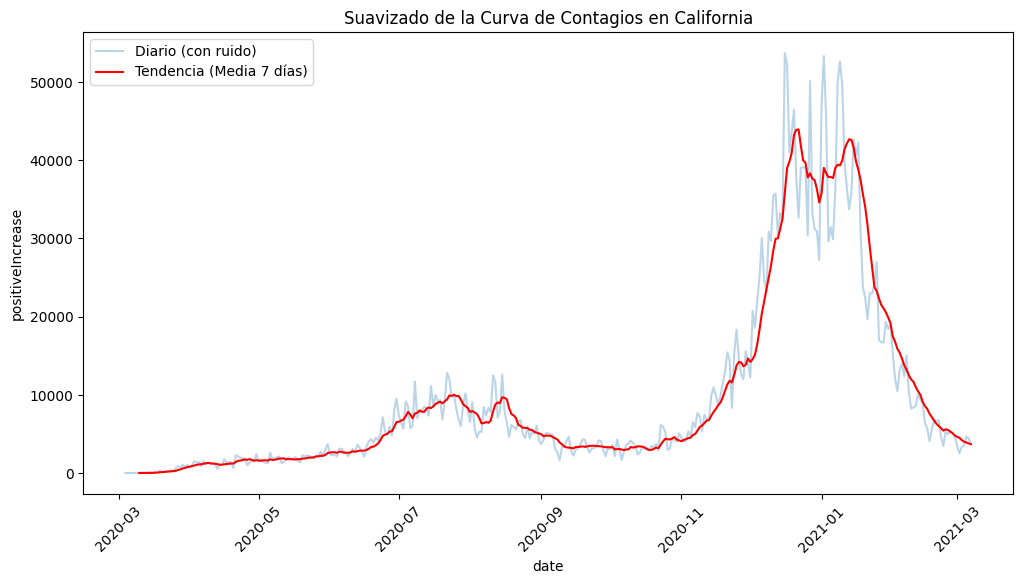

In [59]:
# Filtramos solo los datos de California
df_ca = df[df['state'] == 'CA'].sort_values('date')

# Creamos la media móvil de 7 días para los contagios
df_ca['casos_suaves'] = df_ca['positiveIncrease'].rolling(window=7).mean()

# Graficamos ambos para comparar
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ca, x='date', y='positiveIncrease', alpha=0.3, label='Diario (con ruido)')
sns.lineplot(data=df_ca, x='date', y='casos_suaves', color='red', label='Tendencia (Media 7 días)')

plt.title('Suavizado de la Curva de Contagios en California')
plt.xticks(rotation=45)
plt.show()

In [60]:
# Esto nos dará: cuenta, media, desviación estándar, mínimo, máximo y percentiles
resumen_descriptivo = df[['positiveIncrease', 'deathIncrease', 'hospitalizedCurrently']].describe()

print(resumen_descriptivo)

       positiveIncrease  deathIncrease  hospitalizedCurrently
count      20780.000000   20780.000000           17339.000000
mean        1383.849519      24.790712            1190.576965
std         3023.558742      60.162742            2060.041207
min        -7757.000000    -201.000000               0.000000
25%           65.000000       0.000000             166.500000
50%          435.000000       6.000000             531.000000
75%         1335.250000      24.000000            1279.000000
max        71734.000000    2559.000000           22851.000000


In [63]:
df_limpio = df.copy()

In [64]:
from google.colab import files
df_limpio.to_csv('covid_data_limpio.csv', index=False)
files.download('covid_data_limpio.csv')

print("¡Dataset limpiado y descargado con éxito! ✨")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Dataset limpiado y descargado con éxito! ✨
